## Improving accuracy

    Its difficult to imagine what else to do to improve results. Will try with a stack size of 1 (L=1), which is a 2 channel image effectively. Need to look at the 
    1. Whether the channels are effectively represented need to look 
    2. Attempt cross modality to use image net weights
    3.
    

In [1]:
import os
import sys


up1 = os.path.abspath('../utils/') 
up2 = os.path.abspath('../models/') 
sys.path.insert(0, up1)
sys.path.insert(0, up2)

In [2]:
from optical_flow_data_gen import DataGenerator
from ucf101_data_utils import get_test_data_opt_flow, get_train_data_opt_flow
from motion_network import getVggMotionModel
from spatial_network import getVggModel
from keras.optimizers import SGD
from matplotlib import pyplot as plt
from keras.optimizers import SGD
import cv2 

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


# Cross Modality 

In [1]:
motion_model=getVggMotionModel((224,224,2), 101)

NameError: name 'getVggMotionModel' is not defined

In [4]:
v  = motion_model.layers[1].get_weights()

In [5]:
len(v)

2

In [6]:
v[0].shape

(3, 3, 2, 64)

In [7]:
v[1].shape

(64,)

In [4]:
spatial_model=getVggModel((224,224,3))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
v  = spatial_model.layers[1].get_weights()
len(v)
print(v[0].shape)
print(v[1])

(3, 3, 3, 64)
[ 0.73429835  0.09340367  0.06775674  0.8862966   0.25994542  0.66426694
 -0.01582893  0.3249065   0.68600726  0.06247932  0.58156496  0.2361475
  0.69694996  0.19451167  0.4858922   0.44571847  0.5113422   0.208576
  0.57557714  0.33199573  0.4997983   0.7117759   0.30284074  0.7082712
  0.04548979  0.7446502   0.29845494  0.48211655  0.81658626  0.62603897
  0.3768093   2.064037    0.77311045  0.3459577   0.6130958   0.65459156
  0.39045632  0.50869167  0.2625384   0.23669638  0.07971057  1.1179353
  0.26129362  0.8697589   0.21543622  0.78007823  0.37015367  0.47993386
  0.4313978   0.5084194   0.23049663  0.7636527   0.35419866  0.45794216
  0.4662595   0.09850298  0.3803252   0.66880196  0.4015123   0.90510356
  0.43166816  1.302014    0.5306885   0.48993504]


# Stacking Correctness 

    One question I have is if stacking is being done correctly. An aside to this is there a recognizable pattern for classese in their stack frames (Could you sequence them for better accuracy??) 

In [5]:
params_train = { 'data_dir' : "/data/tvl1_flow",
          'dim': (224,224),
          'batch_size': 32,
          'n_frames': 1,
          'n_frequency': 1,
          'shuffle': True, 
           'validation' : False}

params_valid = { 'data_dir' : "/data/tvl1_flow",
          'dim': (224,224),
          'batch_size': 32,
          'n_frames': 1,
          'n_frequency': 1,
          'shuffle': True, 
           'validation' : True}

In [6]:
id_labels_train = get_train_data_opt_flow('../data/ucf101_splits/trainlist01.txt')
labels = id_labels_train[1]
id_test = get_test_data_opt_flow('../data/ucf101_splits/testlist01.txt', \
                       '../data/ucf101_splits/classInd.txt')

training_generator = DataGenerator(*id_labels_train, **params_train)


validation_generator = DataGenerator(id_test[0], id_test[1], **params_valid)

In [7]:
X = None
y = None
dirs = None

for (_x, _y) in validation_generator:
    X = _x
    y = _y
    break
X.shape

(32, 224, 224, 2)

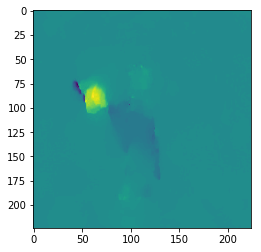

In [20]:
plt.imshow(X[2,:,:,2])

In [17]:
dirs

[['/data/tvl1_flow/u/v_RockClimbingIndoor_g05_c04/frame000307.jpg',
  '/data/tvl1_flow/u/v_RockClimbingIndoor_g05_c04/frame000308.jpg',
  '/data/tvl1_flow/u/v_RockClimbingIndoor_g05_c04/frame000309.jpg',
  '/data/tvl1_flow/u/v_RockClimbingIndoor_g05_c04/frame000310.jpg',
  '/data/tvl1_flow/u/v_RockClimbingIndoor_g05_c04/frame000311.jpg'],
 ['/data/tvl1_flow/u/v_HeadMassage_g03_c04/frame000193.jpg',
  '/data/tvl1_flow/u/v_HeadMassage_g03_c04/frame000194.jpg',
  '/data/tvl1_flow/u/v_HeadMassage_g03_c04/frame000195.jpg',
  '/data/tvl1_flow/u/v_HeadMassage_g03_c04/frame000196.jpg',
  '/data/tvl1_flow/u/v_HeadMassage_g03_c04/frame000197.jpg'],
 ['/data/tvl1_flow/u/v_YoYo_g01_c05/frame000152.jpg',
  '/data/tvl1_flow/u/v_YoYo_g01_c05/frame000153.jpg',
  '/data/tvl1_flow/u/v_YoYo_g01_c05/frame000154.jpg',
  '/data/tvl1_flow/u/v_YoYo_g01_c05/frame000155.jpg',
  '/data/tvl1_flow/u/v_YoYo_g01_c05/frame000156.jpg'],
 ['/data/tvl1_flow/u/v_CuttingInKitchen_g03_c02/frame000059.jpg',
  '/data/tvl1_fl

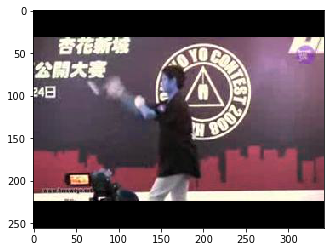

In [22]:
img = cv2.imread('/data/jpegs_256/v_YoYo_g01_c05/frame000154.jpg')
plt.imshow(img)

## Getting back to cross modality

In [56]:
l = spatial_model.layers[1]

In [57]:
l.name

'block1_conv1'

In [8]:
def weight_transform(model_weight, pretrain_weight, num_channels):
    S=0
    # first average weights for kernel 
    kw = pretrain_weight[0]
    for i  in range(3):
        S += kw[:,:,i,:]
    avg = S/3.
    
    new_model_weight = model_weight.copy()
    nkw = new_model_weight[0]
    for i in range(num_channels):
        nkw[:,:,i,:] = avg
    
    new_model_weight[1] = pretrain_weight[1]
    return new_model_weight

In [9]:
for motion_model_layer in motion_model.layers:
    for spatial_model_layer in spatial_model.layers:
        if (motion_model_layer.name == spatial_model_layer.name) and 'conv' in motion_model_layer.name  :
            if motion_model_layer.name == 'block1_conv1':
                motion_model_layer.set_weights(weight_transform(motion_model_layer.get_weights(), \
                                                                spatial_model_layer.get_weights(), 2))
            else:
                motion_model_layer.set_weights(spatial_model_layer.get_weights())

In [10]:
mypotim = SGD(lr=1e-4, momentum=0.9)
motion_model.compile(loss='categorical_crossentropy',
              optimizer=mypotim,
              metrics=['accuracy'])

In [11]:
mod1 = motion_model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    workers=4, epochs=10,
                    verbose=1)

Epoch 1/10
298/298 [==============================] - 122s 408ms/step - loss: 4.6157 - acc: 0.0137 - val_loss: 4.5852 - val_acc: 0.0167
Epoch 2/10
298/298 [==============================] - 119s 400ms/step - loss: 4.5670 - acc: 0.0209 - val_loss: 4.5597 - val_acc: 0.0254
Epoch 3/10
298/298 [==============================] - 119s 401ms/step - loss: 4.5313 - acc: 0.0282 - val_loss: 4.5348 - val_acc: 0.0225
Epoch 4/10
298/298 [==============================] - 119s 401ms/step - loss: 4.4906 - acc: 0.0358 - val_loss: 4.5009 - val_acc: 0.0381
Epoch 5/10
298/298 [==============================] - 119s 400ms/step - loss: 4.4483 - acc: 0.0439 - val_loss: 4.4569 - val_acc: 0.0445
Epoch 6/10
298/298 [==============================] - 119s 400ms/step - loss: 4.4098 - acc: 0.0497 - val_loss: 4.4301 - val_acc: 0.0524
Epoch 7/10
298/298 [==============================] - 119s 400ms/step - loss: 4.3653 - acc: 0.0600 - val_loss: 4.3974 - val_acc: 0.0532
Epoch 8/10
298/298 [============================

In [12]:
motion_model.save_weights(filepath='../data/weights/motion_model_weights_epoch10.hdf5')

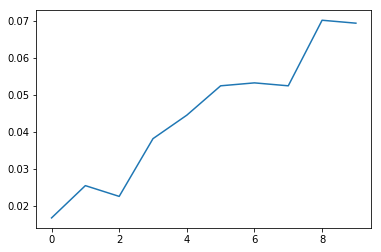

In [14]:
plt.plot(mod1.history['val_acc'])

In [15]:
mod1 = motion_model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    workers=2, epochs=20,
                    verbose=1)

Epoch 1/20
298/298 [==============================] - 118s 397ms/step - loss: 4.2148 - acc: 0.0883 - val_loss: 4.2592 - val_acc: 0.0734
Epoch 2/20
298/298 [==============================] - 119s 399ms/step - loss: 4.1744 - acc: 0.0996 - val_loss: 4.2354 - val_acc: 0.0773
Epoch 3/20
298/298 [==============================] - 119s 399ms/step - loss: 4.1356 - acc: 0.1053 - val_loss: 4.2031 - val_acc: 0.0874
Epoch 4/20
298/298 [==============================] - 119s 400ms/step - loss: 4.1097 - acc: 0.1122 - val_loss: 4.1774 - val_acc: 0.1014
Epoch 5/20
298/298 [==============================] - 119s 399ms/step - loss: 4.0709 - acc: 0.1184 - val_loss: 4.1641 - val_acc: 0.1004
Epoch 6/20
298/298 [==============================] - 119s 400ms/step - loss: 4.0463 - acc: 0.1177 - val_loss: 4.1450 - val_acc: 0.1086
Epoch 7/20
298/298 [==============================] - 119s 399ms/step - loss: 4.0098 - acc: 0.1241 - val_loss: 4.1182 - val_acc: 0.0908
Epoch 8/20
298/298 [============================

In [16]:
motion_model.save_weights(filepath='../data/weights/motion_model_weights_epoch30.hdf5')

In [18]:
motion_model2=getVggMotionModel((224,224,2), printmod=0)
motion_model2.load_weights('../data/weights/motion_model_weights_epoch30.hdf5')

In [19]:
mypotim = SGD(lr=1e-3, momentum=0.9)
motion_model2.compile(loss='categorical_crossentropy',
              optimizer=mypotim,
              metrics=['accuracy'])

In [20]:
mod3 = motion_model2.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    workers=2, epochs=5,
                    verbose=1)

Epoch 1/5
298/298 [==============================] - 119s 399ms/step - loss: 4.0215 - acc: 0.1082 - val_loss: 4.1028 - val_acc: 0.0903
Epoch 2/5
298/298 [==============================] - 119s 400ms/step - loss: 3.9027 - acc: 0.1241 - val_loss: 3.9955 - val_acc: 0.0959
Epoch 3/5
298/298 [==============================] - 119s 400ms/step - loss: 3.8273 - acc: 0.1355 - val_loss: 3.9638 - val_acc: 0.1102
Epoch 4/5
298/298 [==============================] - 119s 400ms/step - loss: 3.7633 - acc: 0.1431 - val_loss: 3.8222 - val_acc: 0.1335
Epoch 5/5
298/298 [==============================] - 119s 400ms/step - loss: 3.6628 - acc: 0.1592 - val_loss: 3.8224 - val_acc: 0.1380


In [21]:
motion_model2.save_weights(filepath='../data/weights/motion_model_weights_epoch35.hdf5')